In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns 


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
url='https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df=pd.read_csv(url,sep=',')

In [8]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [9]:
print('La base de datos cuenta con', df.shape[0], 'observaciones y ',df.shape[1],' variables, las cuales se enlistan a continuación:','\n')
print(df.columns.to_list())

La base de datos cuenta con 3140 observaciones y  108  variables, las cuales se enlistan a continuación: 

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some

In [10]:
df.rename(columns={'19-Oct':'10-19'},inplace=True)

In [12]:
X=df[['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+','White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop','R_birth_2018', 'R_death_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018','Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'Employed_2018', 'Active Physicians per 100000 Population 2018 (AAMC)', 'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)']]
y=df['Obesity_number']

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 34 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   0-9                                                                     3140 non-null   int64  
 1   10-19                                                                   3140 non-null   int64  
 2   20-29                                                                   3140 non-null   int64  
 3   30-39                                                                   3140 non-null   int64  
 4   40-49                                                                   3140 non-null   int64  
 5   50-59                                                                   3140 non-null   int64  
 6   60-69                                                                   3140 non

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1807)

In [15]:
df_train=pd.concat([X_train,y_train], axis=1)

In [16]:
df_train.sample(10)

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Employed_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Obesity_number
2356,14164,13865,16252,13137,11592,13444,12161,7745,4152,51036,...,42344,229.5,205.0,44.434758,21.976455,1.445544,44.769956,49.043738,135.168815,31733
1502,11752,12105,9858,12089,11349,10960,9732,6198,2940,83220,...,42495,273.1,236.3,48.514362,9.441630,1.732149,54.108351,38.845565,154.260622,21579
2175,1057,1040,739,895,812,967,991,665,478,7055,...,3920,206.7,189.1,2.192541,2.496900,0.242323,2.556996,4.381206,9.037691,2005
2628,156890,153791,128440,109021,106067,82153,62876,42062,24639,840121,...,325791,224.8,199.9,298.684496,176.284193,15.778989,327.647841,289.995492,1022.707781,258117
117,1262,1297,1245,1127,1166,1416,1459,879,587,4519,...,3110,207.6,188.2,4.519702,0.723845,0.304777,3.113572,5.835783,12.596287,3390
512,432,456,1502,1152,654,704,640,398,261,2782,...,2242,228.7,202.9,2.837422,1.960561,0.085447,2.933475,2.010061,7.535814,2213
970,6807,7181,6949,6570,6253,7223,6690,4018,2710,49052,...,29170,227.6,206.5,30.680504,15.545785,2.597193,22.515230,33.427176,71.245288,16265
2100,10559,10916,11282,10039,10277,11748,10932,6600,3830,79549,...,37287,292.7,248.6,44.523865,16.485405,1.430308,58.288736,39.856932,167.965340,24755
810,2404,2417,2068,2063,1951,2159,1982,1273,841,15685,...,7846,218.2,193.1,10.448720,4.637231,0.641493,6.947692,11.748015,22.218480,5057
2150,738,703,530,571,498,627,564,428,235,4262,...,2725,206.7,189.1,1.403754,1.598617,0.155145,1.637093,2.805026,5.786297,1228


In [17]:
round(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
0-9,2355.0,12751.0,44191.0,30.0,1277.0,3034.0,8099.0,1208253.0
10-19,2355.0,13367.0,44629.0,37.0,1361.0,3210.0,8801.0,1239139.0
20-29,2355.0,14571.0,52738.0,28.0,1258.0,3107.0,9048.0,1557073.0
30-39,2355.0,13968.0,52082.0,36.0,1232.0,2958.0,8290.0,1501844.0
40-49,2355.0,12898.0,46264.0,26.0,1248.0,3023.0,8158.0,1350076.0
50-59,2355.0,13583.0,45226.0,39.0,1482.0,3469.0,9158.0,1306003.0
60-69,2355.0,11864.0,36414.0,38.0,1455.0,3367.0,8711.0,1014325.0
70-79,2355.0,7180.0,21294.0,17.0,936.0,2164.0,5592.0,572530.0
80+,2355.0,4004.0,12641.0,18.0,531.0,1144.0,2906.0,356275.0
White-alone pop,2355.0,79433.0,251190.0,265.0,8933.0,21519.0,58977.0,7151444.0


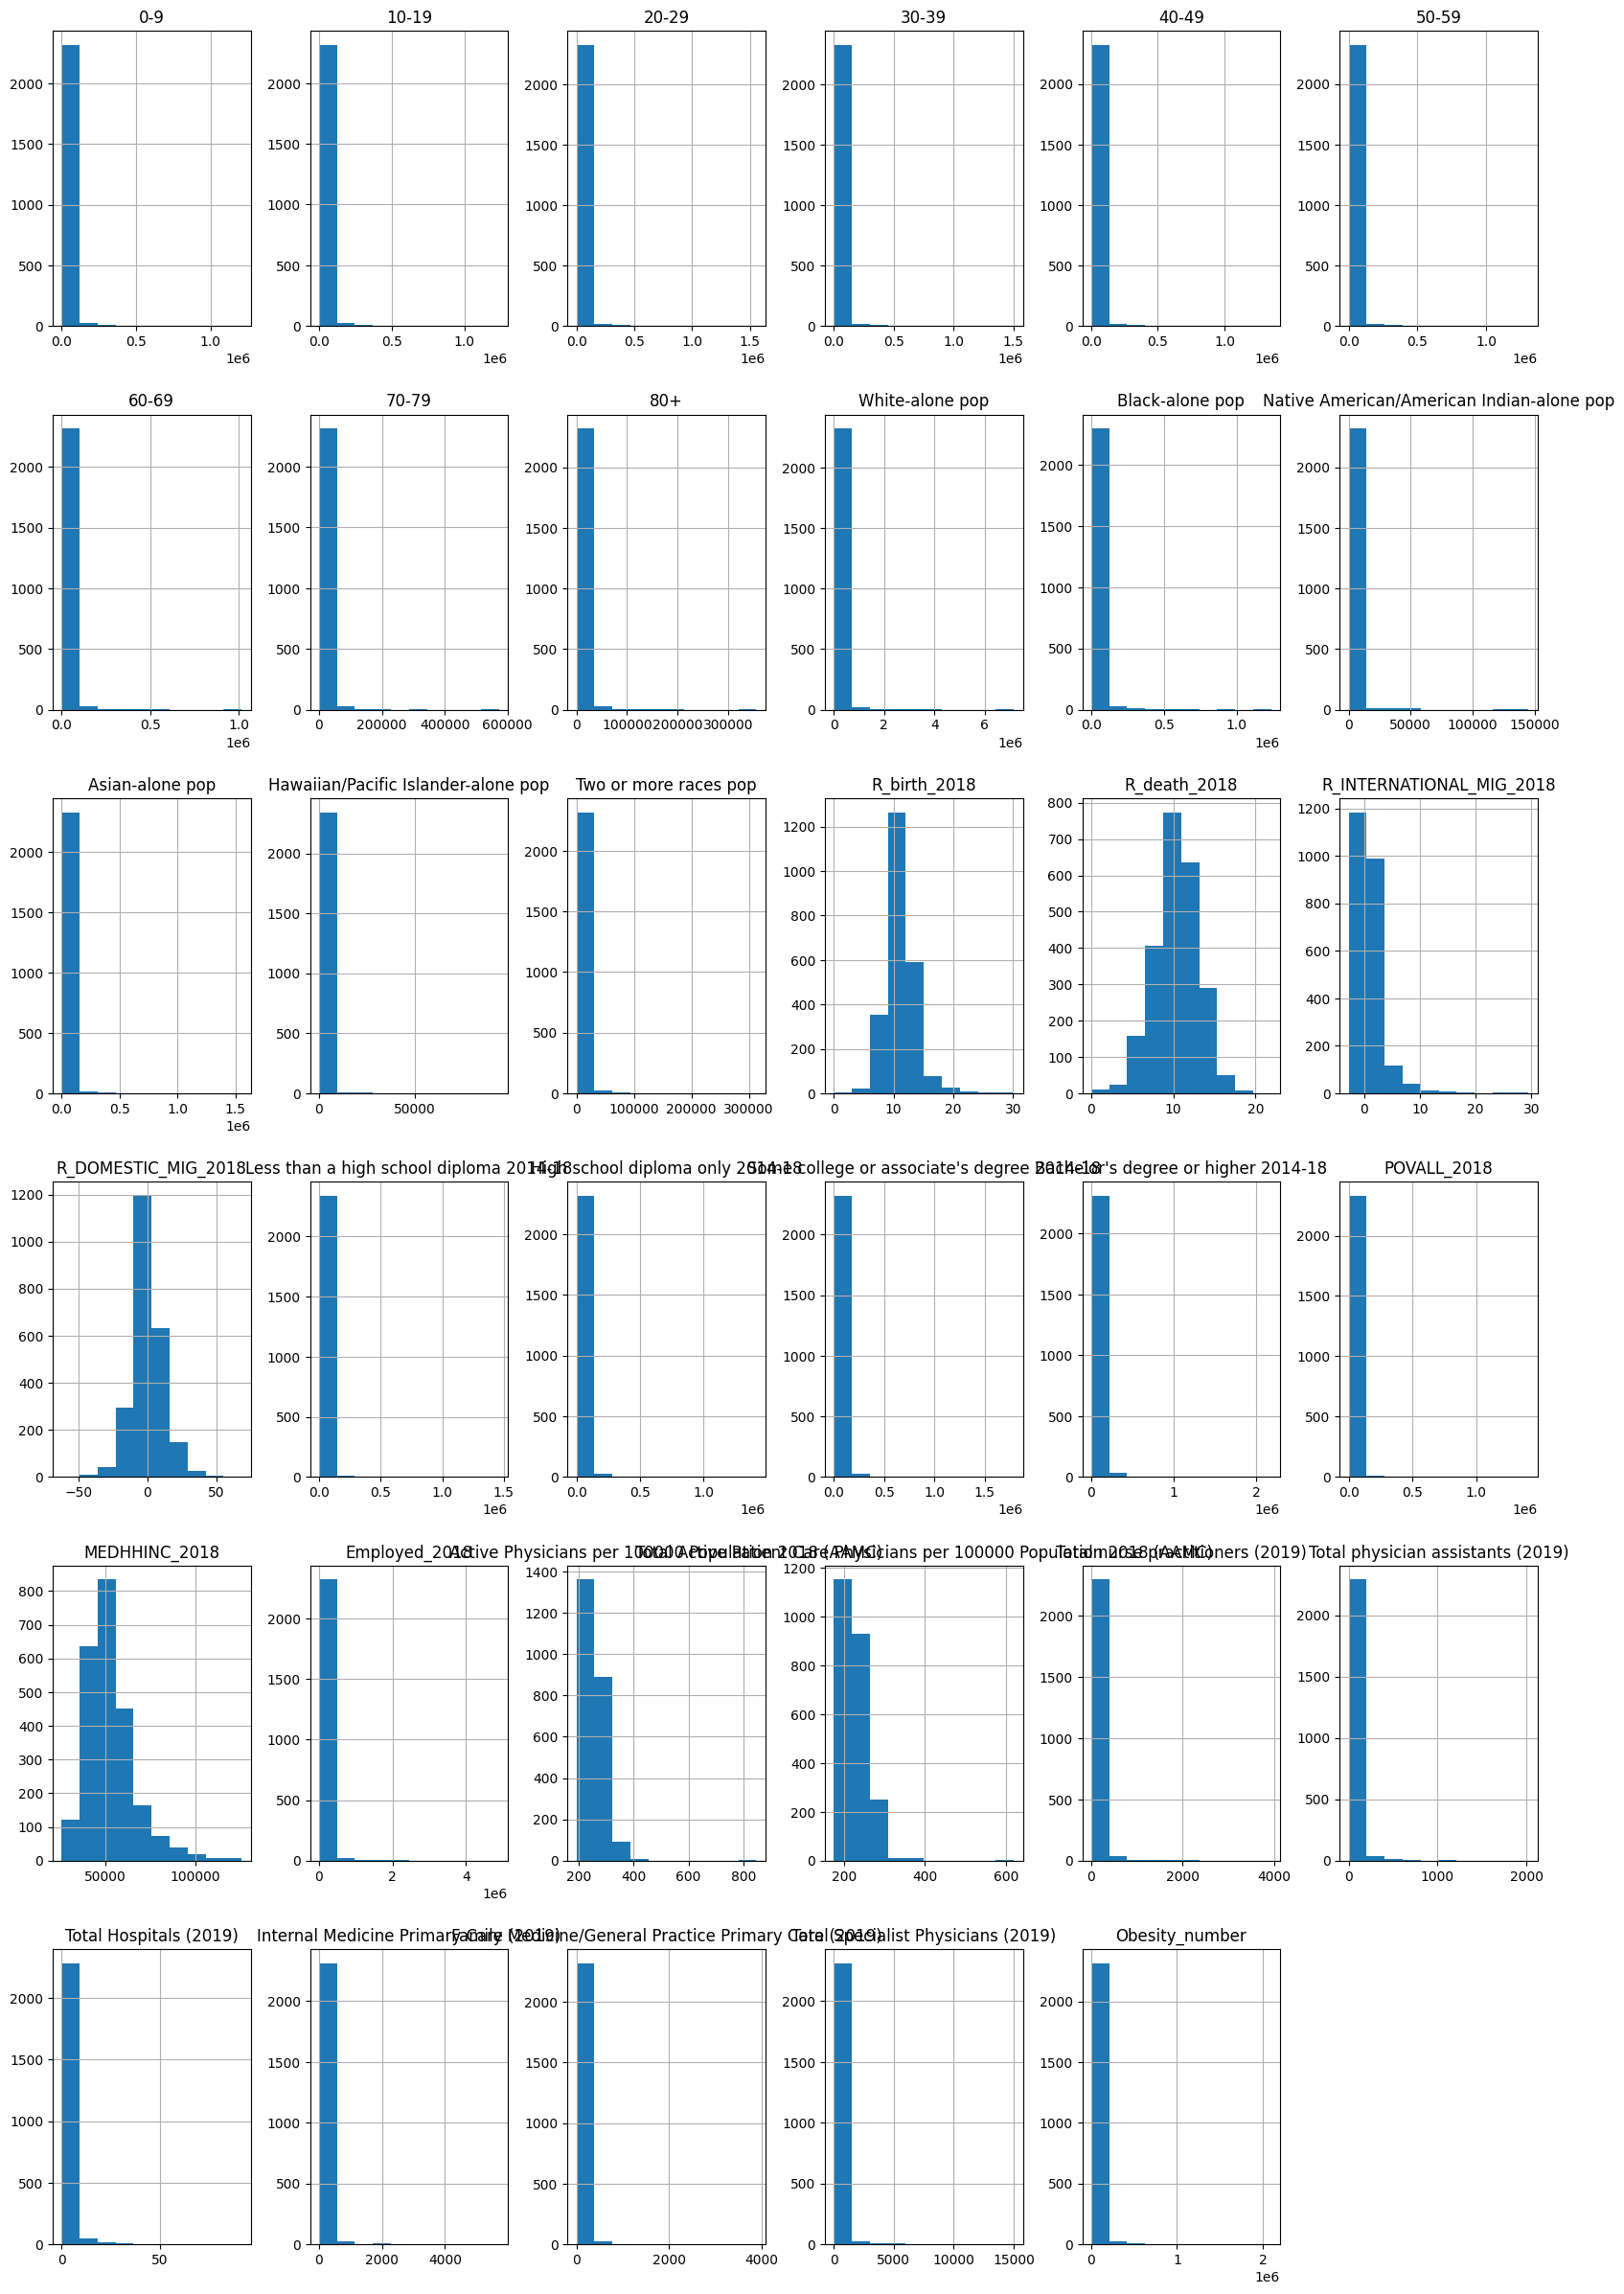

In [18]:
df_train.hist(figsize=(20,30))
plt.show()

In [19]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
df_train.corr()

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,Black-alone pop,Native American/American Indian-alone pop,Asian-alone pop,Hawaiian/Pacific Islander-alone pop,Two or more races pop,R_birth_2018,R_death_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,POVALL_2018,MEDHHINC_2018,Employed_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Obesity_number
0-9,1.000000,0.997582,0.990394,0.992077,0.992588,0.987293,0.982290,0.968718,0.956877,0.984256,0.819083,0.761865,0.834529,0.456944,0.887877,0.103238,-0.207871,0.245192,-0.004091,0.948383,0.975957,0.986631,0.954973,0.974705,0.252798,0.990155,0.137890,0.129183,0.951377,0.933737,0.938933,0.925957,0.977166,0.950492,0.992439
10-19,0.997582,1.000000,0.989301,0.988825,0.993510,0.990085,0.984850,0.972704,0.960395,0.989974,0.799736,0.763415,0.832625,0.451775,0.885996,0.089989,-0.213163,0.246675,0.002963,0.943927,0.974216,0.989414,0.956735,0.967616,0.266421,0.991532,0.143379,0.134923,0.952048,0.931157,0.935415,0.923771,0.978236,0.948358,0.991662
20-29,0.990394,0.989301,1.000000,0.996150,0.992023,0.988747,0.985347,0.972616,0.967999,0.983344,0.808156,0.760504,0.857007,0.462702,0.897057,0.086969,-0.204364,0.252400,-0.015325,0.956510,0.971840,0.984783,0.967520,0.976116,0.239441,0.993449,0.151292,0.142393,0.955903,0.935301,0.918646,0.941059,0.980916,0.961887,0.984849
30-39,0.992077,0.988825,0.996150,1.000000,0.996007,0.991440,0.987188,0.974117,0.968496,0.981897,0.818994,0.752398,0.862548,0.458407,0.894772,0.084265,-0.198714,0.251410,-0.010703,0.954445,0.974408,0.984009,0.974470,0.972192,0.254417,0.996180,0.152002,0.143076,0.957983,0.940334,0.924011,0.944218,0.981329,0.964057,0.986041
40-49,0.992588,0.993510,0.992023,0.996007,1.000000,0.997047,0.990873,0.979895,0.972926,0.987753,0.803755,0.751041,0.863352,0.455685,0.892432,0.073363,-0.198566,0.252074,-0.001257,0.954888,0.976894,0.988351,0.972329,0.966290,0.267730,0.997672,0.149477,0.141261,0.959576,0.938582,0.920352,0.938564,0.981048,0.959043,0.987381
50-59,0.987293,0.990085,0.988747,0.991440,0.997047,1.000000,0.996725,0.987938,0.983813,0.987934,0.803560,0.743200,0.858076,0.451577,0.891875,0.062967,-0.191870,0.253535,-0.000089,0.947922,0.982820,0.989864,0.973905,0.961248,0.276773,0.997037,0.172218,0.163697,0.968451,0.944836,0.914994,0.949241,0.983234,0.966970,0.986316
60-69,0.982290,0.984850,0.985347,0.987188,0.990873,0.996725,1.000000,0.995153,0.990331,0.986609,0.805058,0.743572,0.843268,0.454490,0.892126,0.055122,-0.183763,0.250857,0.010103,0.936245,0.986118,0.990641,0.972519,0.959132,0.274502,0.993659,0.182582,0.174563,0.970157,0.947706,0.917872,0.951892,0.984903,0.968390,0.985589
70-79,0.968718,0.972704,0.972616,0.974117,0.979895,0.987938,0.995153,1.000000,0.993955,0.981044,0.785011,0.744345,0.826870,0.457014,0.886615,0.043540,-0.171580,0.253100,0.024750,0.922336,0.980776,0.984348,0.962965,0.947471,0.270316,0.983235,0.184761,0.177509,0.966813,0.944661,0.900446,0.944569,0.973891,0.959146,0.974698
80+,0.956877,0.960395,0.967999,0.968496,0.972926,0.983813,0.990331,0.993955,1.000000,0.970518,0.781287,0.725781,0.841237,0.458617,0.881743,0.042589,-0.159920,0.256798,-0.001160,0.926839,0.975399,0.972132,0.964031,0.942676,0.259523,0.977685,0.196555,0.188419,0.967090,0.943321,0.880523,0.955589,0.969825,0.966041,0.962718
White-alone pop,0.984256,0.989974,0.983344,0.981897,0.987753,0.987934,0.986609,0.981044,0.970518,1.000000,0.748609,0.762213,0.812780,0.426766,0.872136,0.068147,-0.202245,0.240996,0.020578,0.936587,0.971200,0.989142,0.955678,0.954840,0.273699,0.988536,0.159972,0.154236,0.952877,0.9296

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

In [22]:
ppl=Pipeline(steps=[('scale', MinMaxScaler()),('model',Lasso(alpha=0.1))])

In [23]:
ppl.fit(X_train,y_train)

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.703e+10, tolerance: 1.440e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scale', MinMaxScaler()), ('model', Lasso(alpha=0.1))])

In [24]:
y_pred = ppl.predict(X_test)
print(f'MSE score:{round(mean_absolute_error(y_test, y_pred))}')

MSE score:1904


In [25]:
print(f'R^2 score:{round(ppl.score(X_test,y_test),2)}')

R^2 score:0.99


In [26]:
from sklearn.model_selection import GridSearchCV

param_dict = {'model__alpha': np.arange(0, 200, 5)}

search = GridSearchCV(ppl, param_dict, 
                      cv=10, 
                      scoring='neg_mean_absolute_error')

search.fit(X_train, y_train)

/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/workspace/.pyenv_mirror/user/current/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.640e+10, tolerance: 1.210e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemen

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('model', Lasso(alpha=0.1))]),
             param_grid={'model__alpha': array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195])},
             scoring='neg_mean_absolute_error')

In [27]:
print(f'Best MSE score:{round(abs(search.best_score_),2)}')

Best MSE score:1751.13


In [28]:
print('Best alpha:', search.best_params_)

Best alpha: {'model__alpha': 5}


In [30]:
best_ppl=Pipeline(steps=[('scale', MinMaxScaler()),('model',Lasso(alpha=5))])
best_ppl.fit(X_train,y_train)
y_pred_best = best_ppl.predict(X_test)
print(f'MSE score:{round(mean_absolute_error(y_test, y_pred_best))}')
print(f'R^2 score:{round(best_ppl.score(X_test,y_test),2)}')

MSE score:1901
R^2 score:0.99


In [32]:
import pickle
filename = '/workspace/reg-linear-regression/models/final_model.sav'
pickle.dump(best_ppl, open(filename, 'wb'))